## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [83]:
# Check the number of mice uning .nunique method
mouse_count = pd.DataFrame({"Mouse Count": [mouse_study_df["Mouse ID"].nunique()]})

#remove index assignment for prettier appearence 
mouse_count.set_index('Mouse Count',inplace=True)

#print observations above the dataframe for clean and professional look
mouse_count_print = len(mouse_study_df["Mouse ID"].unique())
print(len(mouse_study_df), "records where found in the dataframe,")
print("with a count of", mouse_count_print, "unique Mouse ID records.")

#display dataframe with mouse count
mouse_count

1893 records where found in the dataframe,
with a count of 249 unique Mouse ID records.


""
Mouse Count
249


In [207]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. subset= find duplicates in specified columns 
duplicate_IDs = mouse_study_df[['Mouse ID', 'Timepoint']]

#use dataframe.duplicated to find duplicate ID using .duplicated
duplicate_IDs = duplicate_IDs[duplicate_IDs.duplicated(subset=['Mouse ID', 'Timepoint'])]

#display duplicates in a dataframe
duplicate_IDs.head()



,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [75]:
# Optional: Get all the data for the duplicate mouse ID. 

#method below automatically searches for duplicates without manual labor
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
print("Below you can see all the information about the duplicate mice in this study")
duplicate_mice

Below you can see all the information about the duplicate mice in this study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [226]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and timepoint in study.

#manually drop known duplicate mice if 'mouse id' isnt equal to (!=) "mouse id'
cleaned_mice = mouse_study_df[mouse_study_df['Mouse ID']!= 'g989']

# dropped all known duplicates manually using isin and known duplicates
#cleaned_mice = mouse_study_df.loc[~mouse_study_df['Mouse ID'].isin(['g989'])].reset_index(drop=True)

#didnt like the above results so tried a .drop_duplicates method,but couldnt get it to work
#cleaned_mice = mouse_study_df.drop_duplicates(inplace=False,keep=False,subset=['Mouse ID', 'Timepoint'])
cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [192]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(cleaned_mice), "rows in the cleaned dataframe after dropping duplicates.")
print(len(mouse_study_df)-len(cleaned_mice), "duplicate record(s) were found and dropped from the dataframe.")

# generate df
num_clean_mice = pd.DataFrame({"Unique Mouse IDs" :[cleaned_mice['Mouse ID'].nunique()]})

#drop index #
num_clean_mice.set_index('Unique Mouse IDs',inplace=True)
num_clean_mice

There are 1880 rows in the cleaned dataframe after dropping duplicates.
13 duplicate record(s) were found and dropped from the dataframe.


""
Unique Mouse IDs
248


## Summary Statistics

In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)']

#easiest path to producing desired calculations within a dataframe using pandas
tumor_volume = pd.DataFrame({
'Count': drug_regimen.count(),
'Mean': drug_regimen.mean(),
'Median': drug_regimen.median(),
'Variance': drug_regimen.var(),
'Standard Deviation': drug_regimen.std(),
'SEM': drug_regimen.sem()
})
print("TUMOR SUMMARY STATISTICS TABLE")
tumor_volume




TUMOR SUMMARY STATISTICS TABLE


,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [194]:
#this is the aggregate method
summary_table = cleaned_mice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Treatments/Measurments')

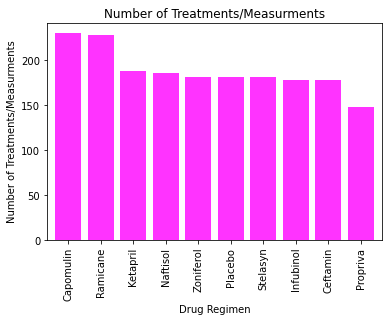

In [195]:
cleaned_mice['Drug Regimen'].value_counts().plot(kind='bar',align='center',width=0.8, alpha=0.8, color='fuchsia')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments/Measurments')
plt.title('Number of Treatments/Measurments')

Text(0.5, 1.0, 'Number of Treatments/Measurments')

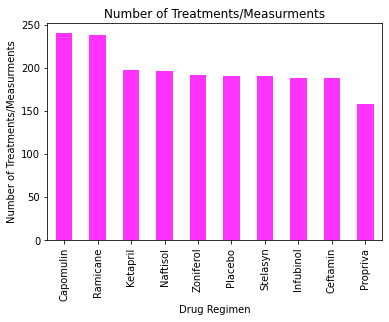

In [196]:
#matplot
#find drugs used
x_plot = cleaned_mice['Drug Regimen'].value_counts()

#find mice experimented on for each regimen
y_plot = tumor_volume['Count'].count()

#assemble plot
plot_data = x_plot.add(y_plot, fill_value=0)
plot_data.plot(kind="bar", alpha=0.8, facecolor="fuchsia")

#format plot
plt.ylabel('Number of Treatments/Measurments')
plt.xlabel('Drug Regimen')
plt.title('Number of Treatments/Measurments')

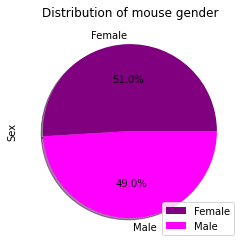

Method generated using pandas


In [222]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
py_gender = cleaned_mice['Sex'].value_counts()
labels = ["Female", "Male"]
colors = ["purple", "fuchsia"]
py_gender.plot(kind='pie',colors=colors,labels=labels, autopct='%1.1f%%',title='Distribution of mouse gender',shadow=True)
plt.legend(loc=4)
plt.show()
print('Method generated using pandas')

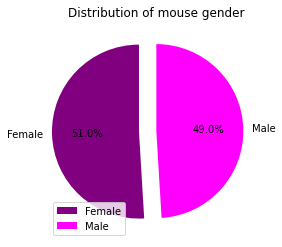

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.2, 0)
plt.pie(py_gender,colors=colors, explode=explode, labels=labels, startangle=90, autopct="%1.1f%%")
plt.title("Distribution of mouse gender")
plt.legend(loc=3)
plt.show()

## Quartiles, Outliers and Boxplots

In [213]:
cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [242]:
#assign specific drug regimens to variable using 'isin' to check for each specified element in dataframe
treatment = cleaned_mice[cleaned_mice['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# find the last recorded (greatest) time point for each study mouse by ID before assumed death or cure using groupby.max
time_of_death = pd.DataFrame({'Timepoint': treatment.groupby('Mouse ID')['Timepoint'].max()})

#merge dataframes to get tumor volume at last recorded timepoint for each specified element in drug regimen
final_tumor_volume = pd.merge(time_of_death, treatment, how='left', on = ['Mouse ID', 'Timepoint'])
#final_tumor_volume

#reset index because it looks way better imo
final_tumor_volume_reset_index = final_tumor_volume.set_index('Mouse ID')
final_tumor_volume_reset_index

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a275,45,Ceftamin,Female,20,28,62.999356,3
a411,45,Ramicane,Male,3,22,38.407618,1
a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
y769,45,Ceftamin,Female,6,27,68.594745,4
y793,45,Capomulin,Male,17,17,31.896238,2
y865,45,Ceftamin,Male,23,26,64.729837,3


In [281]:
#Checking to see how many mice made it to the final timepoint recording
treatment_mouse = final_tumor_volume.value_counts()
print("There are", len(treatment_mouse), "mice that recorded a final tumor volume")


There are 100 mice that recorded a final tumor volume


In [339]:
treatment_used

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [341]:
# Put treatments into a list for a for loop (and later for plot labels)
treatment_used = list(final_tumor_volume['Drug Regimen'].unique())
#treatment_used


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatment_used:
    tumor_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] ==drugs, 'Tumor Volume (mm3)']
    #assign mouse id and values to list
    mouse_id = tumor_data.index.tolist()
    id_values = tumor_data.values.tolist()
    
    #append values to empty list
    tumor_volume_data.append(id_values)
    
    #split drug regimen/tumor vol population data into quantiles
    quartile_data = tumor_data.quantile([0.25, 0.5, 0.75])
    
    lower_quartile = quartile_data[0.25]
    upper_quartile = quartile_data[0.75]
    inter_quartile_range = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*inter_quartile_range)
    upper_bound = upper_quartile + (1.5*inter_quartile_range)
    

  # Determine outliers using upper and lower bounnd print results and print all results in a for loop
    print(drugs)
    print(f" Lower quartile of last recorded tumor volume is: {lower_quartile.round(2)} (mm3)")
    print(f" Upper quartile of last recorded tumor volume is: {upper_quartile.round(2)} (mm3)")
    print(f" Interquartile range of last recorded tumor volume is: {inter_quartile_range.round(2)} (mm3)")
    print(f" Median range of last recorded tumor volume is: {quartile_data[.5].round(2)} (mm3)")
    print('-------------------------------------------------------------------------------------------')
    print(f" Values below {lower_bound.round(2)} (mm3) would be outliers.")
    print(f" Values above {upper_bound.round(2)} (mm3) would also be outliers.")
    print('--------------------------------------------------------------------------------------------')
    

Infubinol
 Lower quartile of last recorded tumor volume is: 54.05 (mm3)
 Upper quartile of last recorded tumor volume is: 65.53 (mm3)
 Interquartile range of last recorded tumor volume is: 11.48 (mm3)
 Median range of last recorded tumor volume is: 60.17 (mm3)
-------------------------------------------------------------------------------------------
 Values below 36.83 (mm3) would be outliers.
 Values above 82.74 (mm3) would also be outliers.
--------------------------------------------------------------------------------------------
Ceftamin
 Lower quartile of last recorded tumor volume is: 48.72 (mm3)
 Upper quartile of last recorded tumor volume is: 64.3 (mm3)
 Interquartile range of last recorded tumor volume is: 15.58 (mm3)
 Median range of last recorded tumor volume is: 59.85 (mm3)
-------------------------------------------------------------------------------------------
 Values below 25.36 (mm3) would be outliers.
 Values above 87.67 (mm3) would also be outliers.
-------------

In [354]:
#print list to check if data appended correctly
tumor_volume_data

[[67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.321345799999996,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,
  55.65068132,
  46.25011212,
  54.04860769,
  51.54243058,
  50.00513807,
  58.26844248,
  67.68556862,
  62.75445141],
 [62.99935619,
  45.0,
  56.05774909,
  55.74282869,
  48.72207785,
  47.784681799999994,
  61.84902336,
  68.92318457,
  67.74866174,
  57.91838132,
  46.78453491,
  59.85195552,
  64.29983003,
  59.74190064,
  61.43389223,
  64.19234114,
  45.0,
  52.92534846,
  45.0,
  67.52748237,
  45.0,
  64.63494887,
  61.38666032,
  68.59474498,
  64.72983655],
 [38.407618299999996,
  43.04754260000001,
  38.81036633,
  32.97852192,
  38.34200823,
  33.39765251,
  37.31123552,
  40.65900627,
  29.12847181,
  33.56240217,
  36.37451039,
  31.56046955,
  36.13485243,
  22.05012627,
  30.56462509,
  31.09533505,
  45.22086

In [304]:
#checking tumor data on the test mice from previously generated list and drug regimens of choice
tumor_check = pd.DataFrame(tumor_volume_data)

# write rows as columns .transpose 
tumor_check = tumor_check.transpose()

#use chosen drug regimen to label columns
tumor_check.columns = treatment_used

#print dataframe
tumor_check

,Infubinol,Ceftamin,Ramicane,Capomulin
0,67.973419,62.999356,38.407618,38.982878
1,65.525743,45.000000,43.047543,38.939633
2,57.031862,56.057749,38.810366,30.485985
3,66.083066,55.742829,32.978522,37.074024
4,72.226731,48.722078,38.342008,40.159220
5,36.321346,47.784682,33.397653,47.685963
6,60.969711,61.849023,37.311236,37.311846
7,62.435404,68.923185,40.659006,38.125164
8,60.918767,67.748662,29.128472,38.753265
9,67.289621,57.918381,33.562402,41.483008


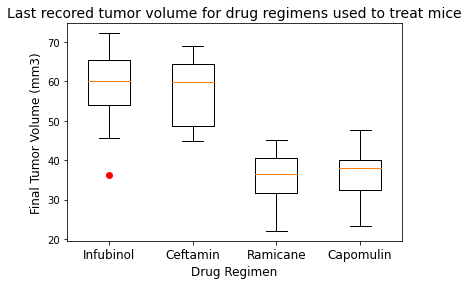

In [355]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

#set title
ax1.set_title('Last recored tumor volume for drug regimens used to treat mice', fontsize=14)

#bring in data for plot using list of drugs and tumor volumes
ax1.boxplot(tumor_volume_data, sym="r", widths=.5, vert=True) 

#format box plot with labels

ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)
ax1.set_xlabel('Drug Regimen', fontsize=12)
plot = ax1.set_xticklabels(treatment_used, fontsize=12)





plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capolulin mouse ID y793 Tumor Size over various timepoints')

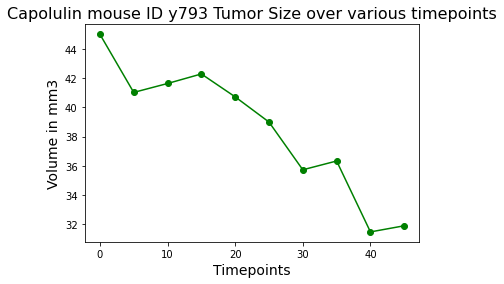

In [370]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#choose mouse and isolate from cleaned df
id_y793 = cleaned_mice.loc[cleaned_mice['Mouse ID'] == 'y793']

#assign axis values from selected mouse
x_axis = (id_y793['Timepoint'])
y_axis = (id_y793['Tumor Volume (mm3)'])

#build axis and format to make pretty
plt.plot(x_axis, y_axis, color="green", marker='o')

#label and format linegraph
plt.xlabel('Timepoints', fontsize=14)
plt.ylabel('Volume in mm3', fontsize=14)
plt.title('Capolulin mouse ID y793 Tumor Size over various timepoints', fontsize=16)

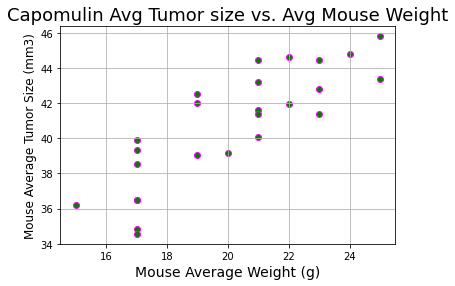

In [393]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_group = cleaned_mice.loc[cleaned_mice['Drug Regimen']== 'Capomulin']
# x axis will be weight
# y axis will be tumor vol mm3

#find averages for weight and tumor size in capomulin mice
capo_mice_tumor_vol_avg = pd.DataFrame(capomulin_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
capo_mice_weight_avg = pd.DataFrame(capomulin_group.groupby('Mouse ID')['Weight (g)'].mean())

#merge weight and tumor averages in one df
merged_capomulin_mice_averages_df = pd.merge(capo_mice_tumor_vol_avg, capo_mice_weight_avg, on='Mouse ID')
merged_capomulin_mice_averages_df

#generate scatterplot axis data
x_scatter = capo_mice_weight_avg['Weight (g)']
y_scatter = capo_mice_tumor_vol_avg['Tumor Volume (mm3)']

#generate scatterplot
color_a =['green']
plt.scatter(x_scatter, y_scatter, marker='o', c=color_a, edgecolors='fuchsia')

#formatting and labeling
plt.title('Capomulin Avg Tumor size vs. Avg Mouse Weight', fontsize=18)
plt.xlabel('Mouse Average Weight (g)', fontsize=14)
plt.ylabel('Mouse Average Tumor Size (mm3)', fontsize=12)
plt.grid(True)





## Correlation and Regression

In [396]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr (capo_mice_tumor_vol_avg, capo_mice_weight_avg)
print(f"The correlation of coefficient between average mouse weight and average tumor volume for the Capomulin regimen is {correlation[0].round(2)}.")
# for mouse weight and average tumor volume for the Capomulin regimen


TypeError: No loop matching the specified signature and casting was found for ufunc add